<a href="https://colab.research.google.com/github/intimanjunath/Clustering/blob/main/e_anomaly_detection_using_pyOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Install necessary libraries
!pip install pyod numpy pandas matplotlib scikit-learn


In [32]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyod.models.auto_encoder import AutoEncoder
from pyod.models.lof import LOF
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs

In [33]:
# Generate synthetic data
def generate_univariate_data(n_samples=1000, anomaly_ratio=0.05):
    """Generate univariate data with anomalies."""
    np.random.seed(42)
    data = np.sin(np.linspace(0, 50, n_samples)) + np.random.normal(0, 0.1, n_samples)
    anomalies = int(n_samples * anomaly_ratio)
    anomaly_indices = np.random.choice(n_samples, anomalies, replace=False)
    data[anomaly_indices] += np.random.normal(5, 1, anomalies)
    return data, anomaly_indices

def generate_multivariate_data(n_samples=1000, n_features=2, anomaly_ratio=0.1):
    """Generate multivariate data with anomalies."""
    X, _ = make_blobs(n_samples=n_samples, centers=1, n_features=n_features, random_state=42)
    anomalies = int(n_samples * anomaly_ratio)
    anomaly_indices = np.random.choice(n_samples, anomalies, replace=False)
    X[anomaly_indices] += np.random.normal(10, 2, (anomalies, n_features))
    return X, anomaly_indices

# Generate univariate data
univariate_data, univariate_anomalies = generate_univariate_data()

# Generate multivariate data
multivariate_data, multivariate_anomalies = generate_multivariate_data()

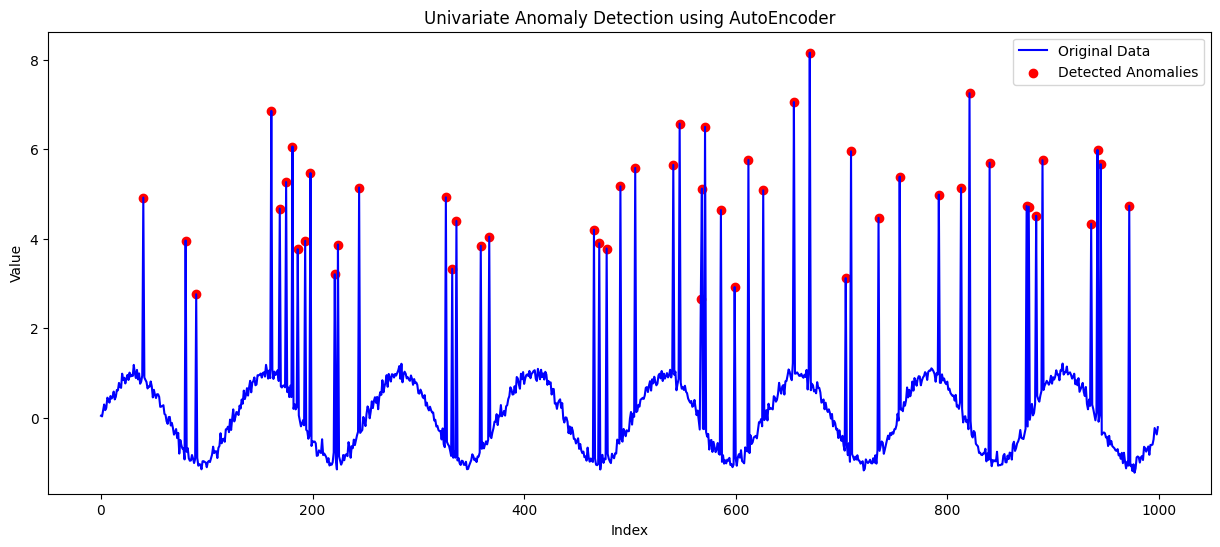

In [34]:
# Univariate anomaly detection using AutoEncoder
def detect_univariate_anomalies_autoencoder(data):
    """Detect univariate anomalies using AutoEncoder with default parameters."""
    # Reshape data for AutoEncoder (requires 2D input)
    data = data.reshape(-1, 1)

    # Normalize data
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)

    # Initialize and train AutoEncoder
    autoencoder = AutoEncoder(contamination=0.05, verbose=0)  # Default model parameters
    autoencoder.fit(data_scaled)

    # Get predictions
    predictions = autoencoder.predict(data_scaled)  # 0: normal, 1: anomaly
    scores = autoencoder.decision_function(data_scaled)

    return predictions, scores

# Detect anomalies in univariate data
univariate_predictions, univariate_scores = detect_univariate_anomalies_autoencoder(univariate_data)

# Plot univariate results
plt.figure(figsize=(15, 6))
plt.plot(univariate_data, label="Original Data", color='blue')
plt.scatter(
    np.where(univariate_predictions == 1),
    univariate_data[univariate_predictions == 1],
    color='red', label="Detected Anomalies"
)
plt.title("Univariate Anomaly Detection using AutoEncoder")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

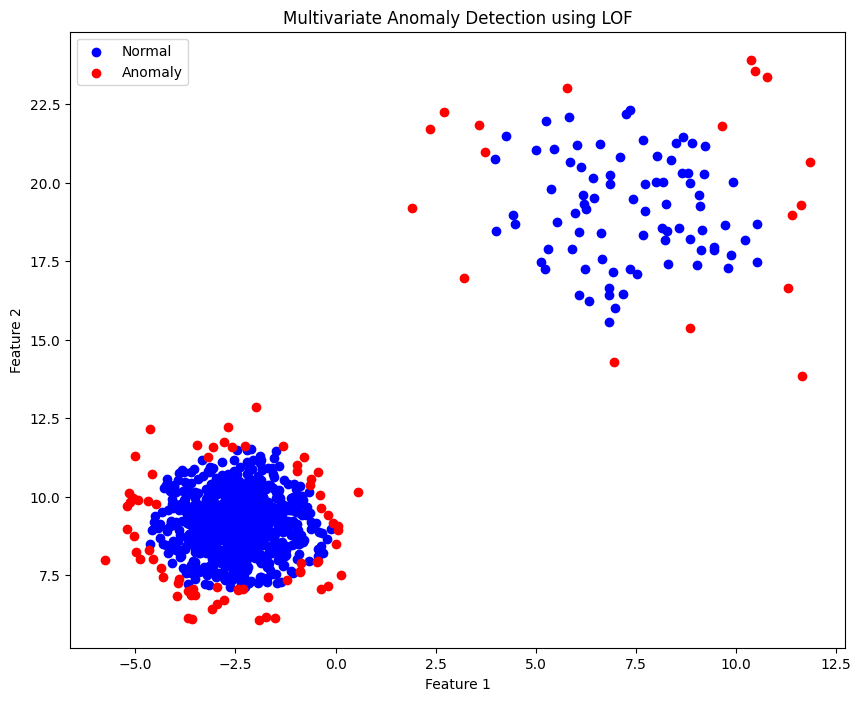

In [35]:
# Multivariate anomaly detection using LOF
def detect_multivariate_anomalies_lof(data):
    """Detect multivariate anomalies using LOF."""
    # Normalize data
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)

    # Initialize and train LOF model
    lof = LOF(contamination=0.1, n_neighbors=20)
    lof.fit(data_scaled)

    # Get predictions
    predictions = lof.predict(data_scaled)  # 0: normal, 1: anomaly
    scores = lof.decision_function(data_scaled)

    return predictions, scores

# Detect anomalies in multivariate data
multivariate_predictions, multivariate_scores = detect_multivariate_anomalies_lof(multivariate_data)

# Visualize results
plt.figure(figsize=(10, 8))
plt.scatter(
    multivariate_data[multivariate_predictions == 0][:, 0],
    multivariate_data[multivariate_predictions == 0][:, 1],
    color='blue', label="Normal"
)
plt.scatter(
    multivariate_data[multivariate_predictions == 1][:, 0],
    multivariate_data[multivariate_predictions == 1][:, 1],
    color='red', label="Anomaly"
)
plt.title("Multivariate Anomaly Detection using LOF")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import classification_report, roc_auc_score

# Evaluate univariate detection
print("Univariate Detection Performance:")
print(classification_report(univariate_predictions, univariate_scores > 0.5))

# Evaluate multivariate detection
print("\nMultivariate Detection Performance:")
print(classification_report(multivariate_predictions, multivariate_scores > 0.5))

# Optional: Compute ROC-AUC if ground truth labels are available
# roc_auc_uni = roc_auc_score(univariate_labels, univariate_scores)
# roc_auc_multi = roc_auc_score(multivariate_labels, multivariate_scores)

Univariate Detection Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       950
           1       1.00      0.96      0.98        50

    accuracy                           1.00      1000
   macro avg       1.00      0.98      0.99      1000
weighted avg       1.00      1.00      1.00      1000


Multivariate Detection Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       911
           1       0.09      1.00      0.16        89

    accuracy                           0.09      1000
   macro avg       0.04      0.50      0.08      1000
weighted avg       0.01      0.09      0.01      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
